In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
df_larger_annotated = pd.read_csv('/content/drive/MyDrive/IDSIA Biomedical Texts/Tweets Project/large16k_with_annotated_part_and_feat_incl_emb.csv')
df_larger_annotated

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,...,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
0,118,1245863648913813504,1148511375976611840,2020-04-03T00:00:15Z,"Dear World👨‍👩‍👧‍👦, you need not panic, because...",1,0,0.00,12.50,0.00,...,6.25,"[-0.040745142847299576, 0.011479376815259457, ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,308,1245863885204152321,20817049,2020-04-03T00:01:11Z,.@fordnation says releasing the projection mod...,1,0,0.00,0.00,0.00,...,3.57,"[-0.2589869797229767, 0.14035490155220032, 0.0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,327,1245863937247076353,866442835,2020-04-03T00:01:24Z,"""Neurologists around the world say that a smal...",0,1,0.00,5.88,0.00,...,0.00,"[-0.02708950825035572, 0.20832084119319916, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,482,1245864250700001280,919734991390724096,2020-04-03T00:02:39Z,Coronavirus: More than one million cases confi...,0,0,2.94,5.88,2.94,...,2.94,"[-0.23723432421684265, 0.072296142578125, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,594,1245864498344296449,895000278201708545,2020-04-03T00:03:38Z,"This is my Gov, @henrymcmaster, today, 4/2/202...",0,1,2.38,0.00,0.00,...,0.00,"[-0.42780137062072754, 0.127772256731987, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,3246439,1248759142933835776,162719860,2020-04-10T23:45:55Z,My story about #specialneeds kids &amp; #silve...,0,0,3.70,11.11,7.41,...,3.70,"[-0.2954484224319458, -0.21568302810192108, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16536,3246515,1248759404666765312,381842403,2020-04-10T23:46:57Z,"Just a quick update: Thursday afternoon, mum h...",0,0,2.00,8.00,2.00,...,2.00,"[-0.03530991077423096, 0.17665432393550873, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16537,3247045,1248761313091780609,1621100112,2020-04-10T23:54:32Z,#COVID_19 \n•We are all we've got.\n•Don’t giv...,1,0,0.00,0.00,0.00,...,4.55,"[-0.20700444281101227, 0.01790219359099865, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16538,3247300,1248762191660093451,494002295,2020-04-10T23:58:02Z,COVID-19 Mental Health Resources from the Coun...,1,0,0.00,6.25,12.50,...,6.25,"[-0.2529967129230499, 0.08556650578975677, -0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Converting embedding column which is in string to list

In [4]:
df_larger_annotated['twitter4sse_embeddings'] = df_larger_annotated['twitter4sse_embeddings'].apply(lambda x: eval(x))

In [5]:
df_annotated = df_larger_annotated[(df_larger_annotated.used_for_annotation==1) & (df_larger_annotated.majority_vote!="NoMajority")]
df_annotated

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,...,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
105,21195,1245916048517292033,297944588,2020-04-03T03:28:28Z,Fuck you china. I was 2 years clear of severe ...,1,0,11.54,3.85,7.69,...,11.54,"[-0.22512023150920868, 0.03707732632756233, 0....",1,PP,PP,PP,PP,PP,PP,PP
107,21587,1245916935998464005,1116031804165767169,2020-04-03T03:32:00Z,Feeling so off today and I can’t tell if this ...,1,0,12.00,4.00,8.00,...,8.00,"[0.010432062670588493, 0.121722012758255, -0.2...",1,PP,PP,PP,PP,PP,PP,PP
138,26533,1245928581353467910,3284687677,2020-04-03T04:18:16Z,Good lord people we need to stop having people...,1,0,9.52,2.38,4.76,...,4.76,"[-0.20182527601718903, 0.24901598691940308, 0....",1,PP,UN,PP,PONP,PP,PP,PP
172,30413,1245940255993155584,1136453384054034432,2020-04-03T05:04:40Z,"I'm telling yall, Chill the fuck out!! This Vi...",0,1,2.33,4.65,2.33,...,2.33,"[0.18443672358989716, 0.22256337106227875, 0.2...",1,PONP,PONP,PONP,PONP,PONP,PP,PONP
288,50758,1245998640499322881,2677225992,2020-04-03T08:56:40Z,Episode of #CoronaVirus panic. Man took his gl...,1,1,6.90,1.72,0.00,...,1.72,"[-0.07753666490316391, -0.44565826654434204, -...",1,PP,PP,PP,PP,PP,PP,PP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15601,3028959,1250474359715594240,747257810010931201,2020-04-15T17:21:34Z,"I have true compassion for these families, but...",1,0,2.33,2.33,4.65,...,6.98,"[-0.36669501662254333, 0.15450149774551392, -0...",1,PONP,PONP,PONP,PONP,PONP,PP,PONP
15832,3086951,1250568412746612737,256188572,2020-04-15T23:35:18Z,"My mom called asked me to come over, she is on...",1,1,11.11,0.00,3.70,...,7.41,"[-0.0625092014670372, -0.19092148542404175, 0....",1,PONP,PONP,PONP,PP,PONP,PP,PONP
15838,3088475,1250572544215642112,1172938416125808640,2020-04-15T23:51:43Z,Having a panic attack while grocery shopping i...,1,0,9.09,2.27,4.55,...,6.82,"[-0.05952261760830879, -0.3383149802684784, -0...",1,PP,PONP,PP,PONP,PP,PP,PP
16087,3144693,1248575471241093120,143915733,2020-04-10T11:36:04Z,Irresponsible reporting and telling people sha...,1,1,0.00,5.13,0.00,...,2.56,"[-0.029525309801101685, 0.2843950092792511, -0...",1,PONP,UN,PONP,PONP,PONP,UN,PONP


### Label Encoding "Majority Vote" column

In [6]:
from sklearn.preprocessing import LabelEncoder
label_mapping = {"PP": 0, "PONP": 1, "UN": 2}
le = LabelEncoder()
le.fit_transform(list(label_mapping.values()))
df_annotated['label'] = df_annotated['majority_vote'].map(label_mapping)

<ipython-input-6-f820b59bb32b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotated['label'] = df_annotated['majority_vote'].map(label_mapping)


In [7]:
for label, encoded_value in label_mapping.items():
    print(f"Label: {label} - Encoded value: {encoded_value}")

Label: PP - Encoded value: 0
Label: PONP - Encoded value: 1
Label: UN - Encoded value: 2


### Standardization of LIWC features



In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
standardized_liwc = sc.fit_transform(df_annotated[['i','illness', 'mental', 'tone_neg', 'emo_neg']])

## Loading unannotated data (16k-213) and preparing it for predicting and making discrepancy data

In [10]:
df_unannotated = df_larger_annotated[(df_larger_annotated.used_for_annotation==0)]
df_unannotated

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,...,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
0,118,1245863648913813504,1148511375976611840,2020-04-03T00:00:15Z,"Dear World👨‍👩‍👧‍👦, you need not panic, because...",1,0,0.00,12.50,0.00,...,6.25,"[-0.040745142847299576, 0.011479376815259457, ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,308,1245863885204152321,20817049,2020-04-03T00:01:11Z,.@fordnation says releasing the projection mod...,1,0,0.00,0.00,0.00,...,3.57,"[-0.2589869797229767, 0.14035490155220032, 0.0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,327,1245863937247076353,866442835,2020-04-03T00:01:24Z,"""Neurologists around the world say that a smal...",0,1,0.00,5.88,0.00,...,0.00,"[-0.02708950825035572, 0.20832084119319916, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,482,1245864250700001280,919734991390724096,2020-04-03T00:02:39Z,Coronavirus: More than one million cases confi...,0,0,2.94,5.88,2.94,...,2.94,"[-0.23723432421684265, 0.072296142578125, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,594,1245864498344296449,895000278201708545,2020-04-03T00:03:38Z,"This is my Gov, @henrymcmaster, today, 4/2/202...",0,1,2.38,0.00,0.00,...,0.00,"[-0.42780137062072754, 0.127772256731987, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,3246439,1248759142933835776,162719860,2020-04-10T23:45:55Z,My story about #specialneeds kids &amp; #silve...,0,0,3.70,11.11,7.41,...,3.70,"[-0.2954484224319458, -0.21568302810192108, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16536,3246515,1248759404666765312,381842403,2020-04-10T23:46:57Z,"Just a quick update: Thursday afternoon, mum h...",0,0,2.00,8.00,2.00,...,2.00,"[-0.03530991077423096, 0.17665432393550873, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16537,3247045,1248761313091780609,1621100112,2020-04-10T23:54:32Z,#COVID_19 \n•We are all we've got.\n•Don’t giv...,1,0,0.00,0.00,0.00,...,4.55,"[-0.20700444281101227, 0.01790219359099865, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16538,3247300,1248762191660093451,494002295,2020-04-10T23:58:02Z,COVID-19 Mental Health Resources from the Coun...,1,0,0.00,6.25,12.50,...,6.25,"[-0.2529967129230499, 0.08556650578975677, -0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
16540 - 213

16327

In [12]:
unannotated_standardized_liwc = sc.fit_transform(df_unannotated[['i','illness', 'mental', 'tone_neg', 'emo_neg']])

In [13]:
df_unannotated_prob_label = df_unannotated[['text']]
df_unannotated_prob_label

,text
0,"Dear World👨‍👩‍👧‍👦, you need not panic, because..."
1,.@fordnation says releasing the projection mod...
2,"""Neurologists around the world say that a smal..."
3,Coronavirus: More than one million cases confi...
4,"This is my Gov, @henrymcmaster, today, 4/2/202..."
...,...
16535,My story about #specialneeds kids &amp; #silve...
16536,"Just a quick update: Thursday afternoon, mum h..."
16537,#COVID_19 \n•We are all we've got.\n•Don’t giv...
16538,COVID-19 Mental Health Resources from the Coun...


### XGB

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score, make_scorer # not able to import balanced_accuray_score
from sklearn.model_selection import GridSearchCV # cross validation, used for hyperparamter tuning
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns

In [15]:
#X = np.array(df_annotated['twitter4sse_embeddings'].tolist())    # run this for only embeddings

# BEST MODEL
X = np.concatenate((    standardized_liwc, np.array(df_annotated['twitter4sse_embeddings'].tolist())   ), axis=1)    # run this for emb + only liwc

#emb_liwc = np.concatenate((    standardized_liwc, np.array(df_annotated['twitter4sse_embeddings'].tolist())   ), axis=1)   # run these 2 for emb + liwc + 2 features
#X = np.concatenate(  (df_annotated[['panic_kw_count', 'symptoms_ext_count']].values, emb_liwc    ), axis=1)

#X = standardized_liwc  # run this for onlt liwc

#X = np.concatenate((   standardized_liwc, df_annotated[['panic_kw_count', 'symptoms_ext_count']].values   ), axis=1)   # run this for liwc + 2 features

y = np.array(df_annotated['label'])

In [16]:
X

array([[ 1.04879875e+00, -7.72953559e-02,  7.78759369e-01, ...,
        -4.30038571e-02,  1.49781048e-01, -5.37211038e-02],
       [ 1.14686465e+00, -2.41104780e-02,  8.65488301e-01, ...,
         2.98047848e-02,  3.91920984e-01,  4.32758518e-02],
       [ 6.18161564e-01, -5.98507160e-01, -4.09689292e-02, ...,
         2.95174539e-01,  2.75589973e-01,  2.05261290e-01],
       ...,
       [ 5.26491271e-01, -6.37509404e-01, -9.97207868e-02, ...,
        -1.57644153e-01,  5.35904020e-02, -4.30524647e-02],
       [-1.41137608e+00,  3.76548936e-01, -1.37267770e+00, ...,
         4.79702749e-06,  3.48803520e-01, -2.18136534e-01],
       [ 1.10777153e-01,  2.45359570e-01, -4.09689292e-02, ...,
        -2.22300664e-01,  2.22533271e-01,  1.02165766e-01]])

In [17]:
X.shape

(160, 773)

In [18]:
# NOTE - this code is wrong bcoz its not taking discrepancy row of all the 10 runs, just 1 run (the last iteration)

# # Ref - https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f
# xgb_f1scores = []
# xgb_micro_f1scores = []
# xgb_macro_f1scores = []
# xgb_rocaucscore = []
# xgb_praucscore = []

# for run in range(10):

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=run, stratify = y)

#     clf_xgb = xgb.XGBClassifier(objective='multi:softmax', missing=0, seed=42, num_class=3)

#     # XGBoost
#     clf_xgb.fit(X_train, y_train,
#               verbose=False,  # set to True for individual use
#               early_stopping_rounds=10,
#               #eval_metrics='aucpr',
#               eval_set = [(X_test,y_test)])
#     y_pred = clf_xgb.predict(X_test)

#     f1 = f1_score(y_test, y_pred,average='weighted')
#     xgb_f1scores.append(f1)

#     micro_f1 = f1_score(y_test, y_pred, average='micro')
#     xgb_micro_f1scores.append(micro_f1)

#     macro_f1 = f1_score(y_test, y_pred, average='macro')
#     xgb_macro_f1scores.append(macro_f1)

#     # run this for emb+liwc
#     a = clf_xgb.predict_proba(   np.concatenate((    unannotated_standardized_liwc, np.array(df_unannotated['twitter4sse_embeddings'].tolist())   ), axis=1)        )
#     a = pd.DataFrame(a, columns=['PP', 'PONP', 'UN'])
#     a

#     # run for only emb+liwc
#     df_unannotated_prob_label['PP_prob'] = list(a['PP'])
#     df_unannotated_prob_label['PONP_prob'] = list(a['PONP'])
#     df_unannotated_prob_label['UN_prob'] = list(a['UN'])

#     # condition where the highest probablity is less than 0.7
#     condition1 = df_unannotated_prob_label[['PP_prob', 'PONP_prob', 'UN_prob']].max(axis=1) < 0.7
#     df_unannotatedproblabel_cond1_index = list(df_unannotated_prob_label[condition1].index)

#     # condition where the difference between 2 highest probabilites in less than 0.4
#     c = df_unannotated_prob_label[['PP_prob', 'PONP_prob', 'UN_prob']].apply(lambda x: sorted(x, reverse=True), axis=1)
#     condition2 = c.apply(lambda x: x[0] - x[1]) < 0.4
#     df_unannotatedproblabel_cond2_index = list(df_unannotated_prob_label[condition2].index)

#     # class_report = classification_report(y_test, y_pred)   # this will print reports of all 10 different sets of folds
#     # print(class_report)

#     # cm = confusion_matrix(y_test, y_pred)    # this will print CMs of all 10 different sets of folds
#     # plt.figure(figsize=(8, 6))
#     # labels = ['PP', 'PONP', 'UN']
#     # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
#     # plt.xlabel('Predicted')
#     # plt.ylabel('True')
#     # plt.title('TrainTest 10 iter liwc + 2features')
#     # plt.show()

#     #rocaucscore = roc_auc_score(y_test, y_pred, multi_class='ovr')
#     #xgb_rocaucscore.append(rocaucscore)

#     # print(y_test.shape, y_pred.shape)
#     # y_pred_prob = clf_xgb.predict_proba(X_test)
#     # print(np.unique(y_test))
#     # print(y_pred_prob.shape[1])
#     # rocaucscore = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')

#     # precision, recall, thresholds = precision_recall_curve(y_test, y_pred)  # Compute precision, recall, and thresholds
#     # pr_auc = auc(recall, precision)  # Calculate PR-AUC
#     # xgb_praucscore.append(pr_auc)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.80      0.89      0.84        18
           2       0.00      0.00      0.00         2

    accuracy                           0.88        48
   macro avg       0.59      0.61      0.60        48
weighted avg       0.86      0.88      0.87        48



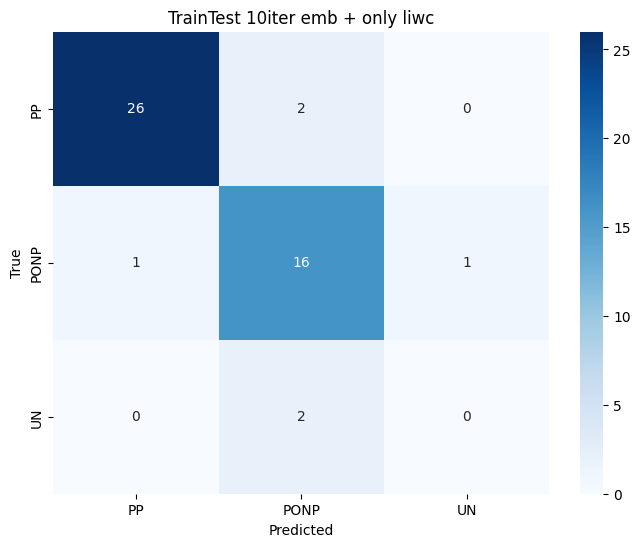

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       0.93      0.78      0.85        18
           2       0.00      0.00      0.00         2

    accuracy                           0.88        48
   macro avg       0.59      0.59      0.59        48
weighted avg       0.84      0.88      0.85        48



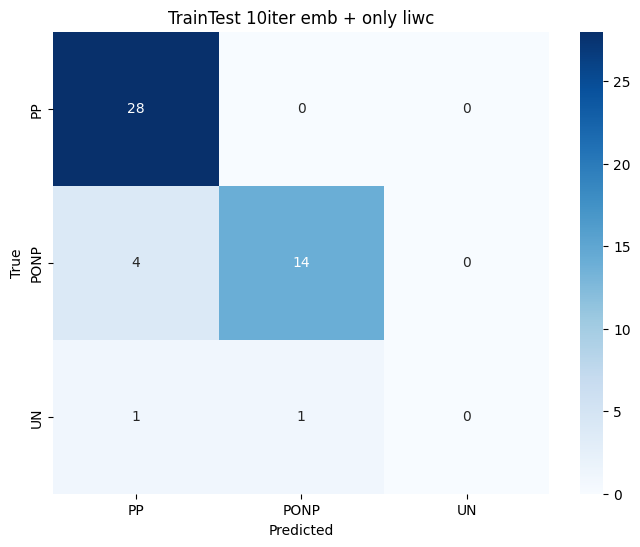

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.94      0.94      0.94        18
           2       0.00      0.00      0.00         2

    accuracy                           0.94        48
   macro avg       0.63      0.65      0.64        48
weighted avg       0.90      0.94      0.92        48



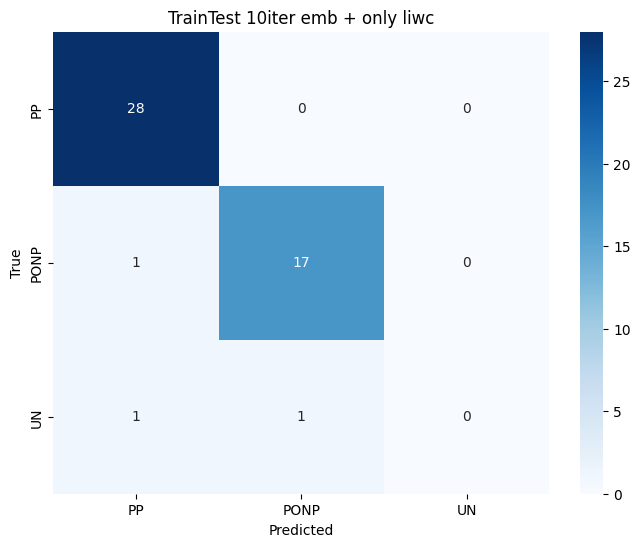

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       0.94      0.89      0.91        18
           2       0.00      0.00      0.00         2

    accuracy                           0.92        48
   macro avg       0.61      0.63      0.62        48
weighted avg       0.88      0.92      0.90        48



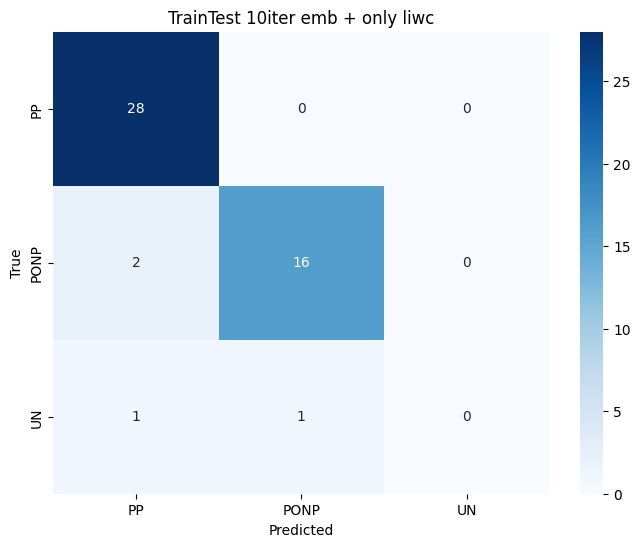

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.86      0.67      0.75        18
           2       0.00      0.00      0.00         2

    accuracy                           0.81        48
   macro avg       0.55      0.54      0.54        48
weighted avg       0.78      0.81      0.79        48



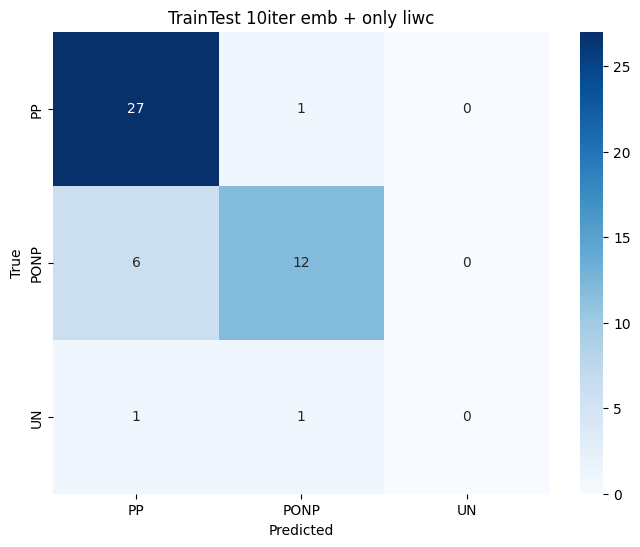

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.76      0.89      0.82        18
           2       0.00      0.00      0.00         2

    accuracy                           0.83        48
   macro avg       0.55      0.58      0.56        48
weighted avg       0.80      0.83      0.82        48



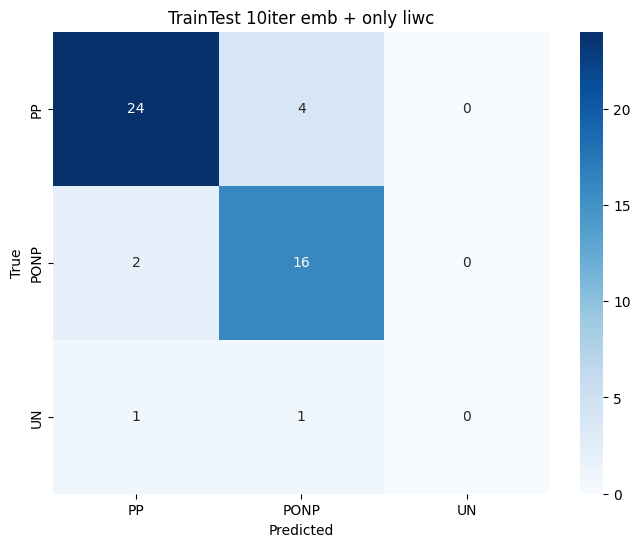

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.83      0.83      0.83        18
           2       0.00      0.00      0.00         2

    accuracy                           0.88        48
   macro avg       0.58      0.60      0.59        48
weighted avg       0.84      0.88      0.86        48



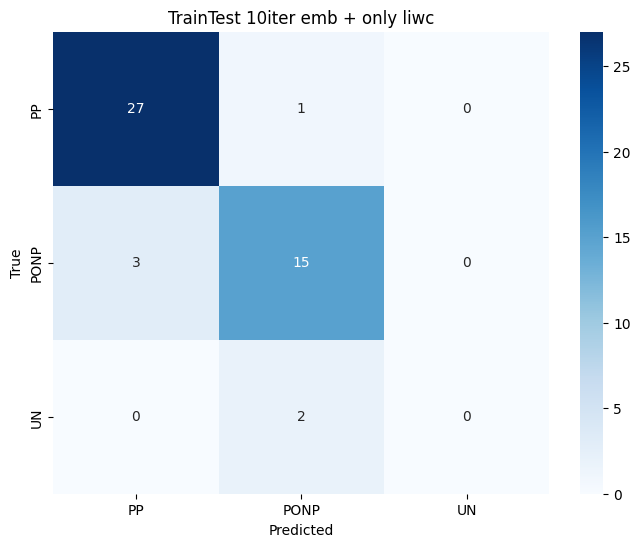

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.89      0.89      0.89        18
           2       0.00      0.00      0.00         2

    accuracy                           0.90        48
   macro avg       0.60      0.62      0.61        48
weighted avg       0.86      0.90      0.88        48



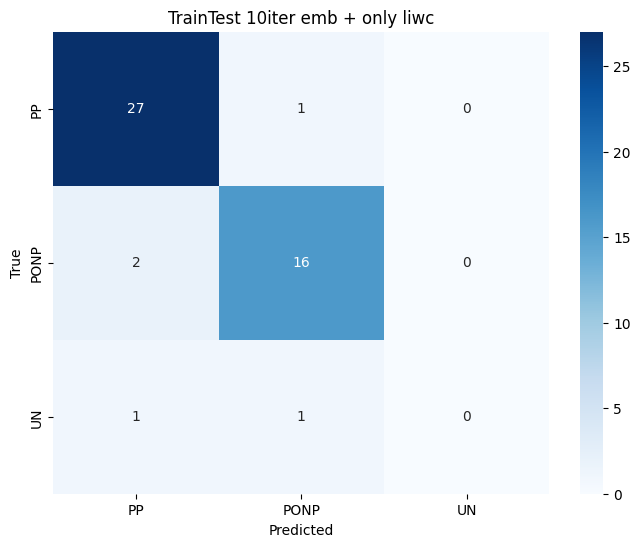

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.78      0.78      0.78        18
           2       0.00      0.00      0.00         2

    accuracy                           0.81        48
   macro avg       0.54      0.56      0.55        48
weighted avg       0.78      0.81      0.79        48



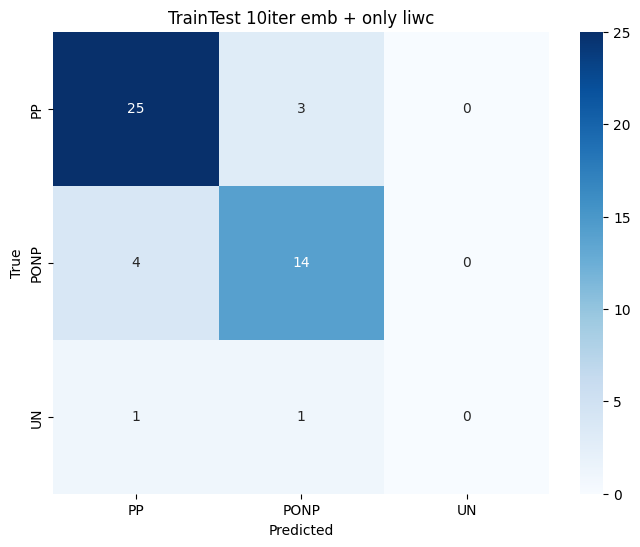

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.74      0.78      0.76        18
           2       0.00      0.00      0.00         2

    accuracy                           0.81        48
   macro avg       0.53      0.56      0.54        48
weighted avg       0.78      0.81      0.80        48



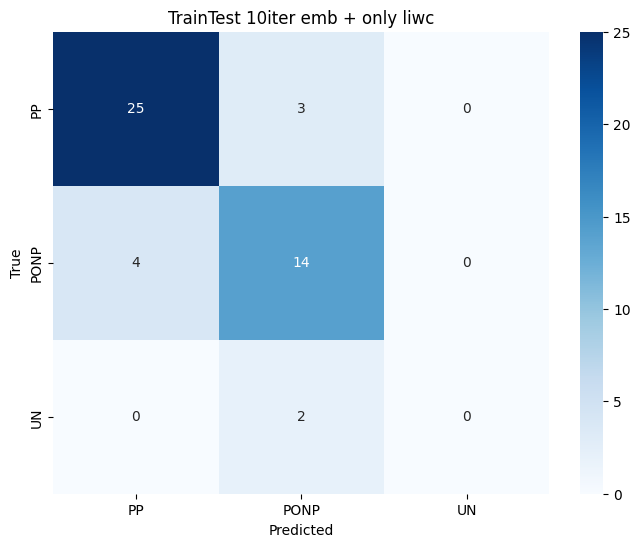

In [69]:
# Ref - https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f
xgb_f1scores = []
xgb_micro_f1scores = []
xgb_macro_f1scores = []
xgb_rocaucscore = []
xgb_praucscore = []
cond1_intersection = set() # empty set to store the intersection of lists
cond2_intersection = set()

for run in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=run, stratify = y)

    clf_xgb = xgb.XGBClassifier(objective='multi:softmax', missing=0, seed=42, num_class=3)

    # XGBoost
    clf_xgb.fit(X_train, y_train,
              verbose=False,  # set to True for individual use
              early_stopping_rounds=10,
              #eval_metrics='aucpr',
              eval_set = [(X_test,y_test)])
    y_pred = clf_xgb.predict(X_test)

    f1 = f1_score(y_test, y_pred,average='weighted')
    xgb_f1scores.append(f1)

    micro_f1 = f1_score(y_test, y_pred, average='micro')
    xgb_micro_f1scores.append(micro_f1)

    macro_f1 = f1_score(y_test, y_pred, average='macro')
    xgb_macro_f1scores.append(macro_f1)

    # run this for emb+liwc
    a = clf_xgb.predict_proba(   np.concatenate((    unannotated_standardized_liwc, np.array(df_unannotated['twitter4sse_embeddings'].tolist())   ), axis=1)        )
    a = pd.DataFrame(a, columns=['PP', 'PONP', 'UN'])
    a

    # run for only emb+liwc
    df_unannotated_prob_label['PP_prob'+str(run)] = list(a['PP'])
    df_unannotated_prob_label['PONP_prob'+str(run)] = list(a['PONP'])
    df_unannotated_prob_label['UN_prob'+str(run)] = list(a['UN'])

    # condition where the highest probablity is less than 0.7
    condition1 = df_unannotated_prob_label[['PP_prob'+str(run), 'PONP_prob'+str(run), 'UN_prob'+str(run)]].max(axis=1) < 0.7
    df_unannotatedproblabel_cond1_index = list(df_unannotated_prob_label[condition1].index)

    if run == 0:   # If it's the first iteration, initialize the set with the first list
        cond1_intersection.update(df_unannotatedproblabel_cond1_index)
    else:   # For subsequent iterations, take the intersection with the previous set
      #if run < 4:
        cond1_intersection.intersection_update(df_unannotatedproblabel_cond1_index)  # intersection_update() method removes the items that is not present in both sets

# ------------------

    # condition where the difference between 2 highest probabilites in less than 0.4
    c = df_unannotated_prob_label[['PP_prob'+str(run), 'PONP_prob'+str(run), 'UN_prob'+str(run)]].apply(lambda x: sorted(x, reverse=True), axis=1)
    condition2 = c.apply(lambda x: x[0] - x[1]) < 0.4
    df_unannotatedproblabel_cond2_index = list(df_unannotated_prob_label[condition2].index)

    if run == 0:   # If it's the first iteration, initialize the set with the first list
        cond2_intersection.update(df_unannotatedproblabel_cond2_index)
    else:   # For subsequent iterations, take the intersection with the previous set
      #if run < 4:
        cond2_intersection.intersection_update(df_unannotatedproblabel_cond2_index)  # intersection_update() method removes the items that is not present in both sets


    class_report = classification_report(y_test, y_pred)   # this will print reports of all 10 different sets of folds
    print(class_report)

    cm = confusion_matrix(y_test, y_pred)    # this will print CMs of all 10 different sets of folds
    plt.figure(figsize=(8, 6))
    labels = ['PP', 'PONP', 'UN']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('TrainTest 10iter emb + only liwc')
    plt.show()

    #rocaucscore = roc_auc_score(y_test, y_pred, multi_class='ovr')
    #xgb_rocaucscore.append(rocaucscore)

    # print(y_test.shape, y_pred.shape)
    # y_pred_prob = clf_xgb.predict_proba(X_test)
    # print(np.unique(y_test))
    # print(y_pred_prob.shape[1])
    # rocaucscore = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')

    # precision, recall, thresholds = precision_recall_curve(y_test, y_pred)  # Compute precision, recall, and thresholds
    # pr_auc = auc(recall, precision)  # Calculate PR-AUC
    # xgb_praucscore.append(pr_auc)

# Convert the final set back to a list to get the result
df_unannotatedproblabel_cond1_index = list(cond1_intersection)
df_unannotatedproblabel_cond2_index = list(cond2_intersection)

In [105]:
def calc_cond1_majority_based(row):
  max_value = []
  for run in range(10):
      # print(run, max_value)
      # condition where the highest probablity is less than 0.7
      max_value.append(1 if np.max(row[['PP_prob'+str(run), 'PONP_prob'+str(run), 'UN_prob'+str(run)]].values)<0.7 else 0)
  if np.sum(max_value)>5:
    return 1
  else:
    return 0
      # df_unannotatedproblabel_cond1_index = list(df_unannotated_prob_label[condition1].index)


def calc_cond1_based(row):
  max_value = []
  for run in range(10):
      # print(run, max_value)
      # condition where the highest probablity is less than 0.7
      max_value.append(1 if np.max(row[['PP_prob'+str(run), 'PONP_prob'+str(run), 'UN_prob'+str(run)]].values)<0.7 else 0)
  return max_value
  # if 0 in max_value:
  #   return 0
  # else:
  #   return 1
  # if np.sum(max_value)==9:
  #   return 1
  # else:
  #   return 0
      # df_unannotatedproblabel_cond1_index = list(df_unannotated_prob_label[condition1].index)

In [94]:
df_unannotated_prob_label['cond1'] = df_unannotated_prob_label.apply(lambda row: calc_cond1_majority_based(row),1)

In [106]:
df_unannotated_prob_label['cond1'] = df_unannotated_prob_label.apply(lambda row: calc_cond1_based(row),1)

In [101]:
df_unannotated_prob_label[ df_unannotated_prob_label['cond1'] ==1]

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
34,The fake news media and Democrats are in a pan...,0.366154,0.194858,0.438988,1,0,0.175692,0.675224,0.149084,0.618668,...,0.174009,0.352690,0.357264,0.290046,0.756382,0.097656,0.145962,0.366154,0.194858,0.438988
142,"#COVID19 Panic in the world, People dying by t...",0.670862,0.181505,0.147634,1,0,0.350969,0.598280,0.050751,0.363628,...,0.031665,0.377558,0.260864,0.361579,0.561539,0.334306,0.104155,0.670862,0.181505,0.147634
370,My latest for @theblaze -- Previous generation...,0.563630,0.269487,0.166882,1,1,0.443789,0.454398,0.101813,0.505434,...,0.035024,0.087875,0.733833,0.178293,0.582186,0.226287,0.191527,0.563630,0.269487,0.166882
602,More shock and awe...\nDiscomfort and No Mercy...,0.328241,0.623589,0.048170,1,0,0.280072,0.654339,0.065589,0.613728,...,0.027473,0.385104,0.564225,0.050671,0.251821,0.621188,0.126991,0.328241,0.623589,0.048170
794,"“I puked and had fever and chills,” that’s how...",0.333897,0.123693,0.542410,1,1,0.410807,0.472846,0.116347,0.377072,...,0.114728,0.609485,0.256761,0.133754,0.573721,0.345424,0.080855,0.333897,0.123693,0.542410
1651,"ICYMI, my new #RealityChek post - humbly, of c...",0.468359,0.079488,0.452153,1,1,0.531468,0.336318,0.132214,0.595783,...,0.419699,0.199357,0.310006,0.490636,0.767386,0.139829,0.092785,0.468359,0.079488,0.452153
1826,#COVID19 was designed to disintegrate us. Just...,0.547507,0.358483,0.094010,1,1,0.593068,0.343648,0.063284,0.369878,...,0.061102,0.548989,0.335912,0.115099,0.464070,0.473567,0.062363,0.547507,0.358483,0.094010
1918,What my point is that Government should focus ...,0.549406,0.209844,0.240750,1,0,0.503591,0.324834,0.171575,0.530626,...,0.179334,0.473369,0.217425,0.309206,0.668055,0.092370,0.239575,0.549406,0.209844,0.240750
1989,A few days ago #NewzroomAfrika405 was leading ...,0.522647,0.329921,0.147432,1,0,0.493698,0.321981,0.184321,0.441216,...,0.382689,0.358983,0.462657,0.178360,0.615368,0.160287,0.224345,0.522647,0.329921,0.147432
2110,https://t.co/ft2QvyrozX\n\nThis is the most se...,0.816385,0.122989,0.060626,1,1,0.433476,0.468674,0.097850,0.448108,...,0.131526,0.400595,0.324900,0.274505,0.555416,0.308696,0.135888,0.816385,0.122989,0.060626


In [103]:
df_unannotated_prob_label[19:20].values


array([["Omg! I have said all along we have not seen the panic yet!! Idiocracy at it's best to confront two people who are in SRUBS about shopping for groceries for their family. The fear hasn't even begun.#coronavirus #SupportHealthcareWorkers #thepanicstarts https://t.co/GwHMUbyBs8",
        0.7882500886917114, 0.13710877299308777, 0.07464111596345901, 0,
        1, 0.668134868144989, 0.26855409145355225, 0.06331099569797516,
        0.5720992088317871, 0.3289286494255066, 0.09897210448980331,
        0.5193501710891724, 0.45843517780303955, 0.02221463806927204,
        0.5698292255401611, 0.36855027079582214, 0.06162054464221001,
        0.5933698415756226, 0.2890375554561615, 0.11759256571531296,
        0.8448590636253357, 0.1110575869679451, 0.044083401560783386,
        0.27001211047172546, 0.5324362516403198, 0.1975516676902771,
        0.5014504194259644, 0.3299655616283417, 0.16858401894569397,
        0.8609536290168762, 0.09174462407827377, 0.04730169475078583,
        0.78

In [108]:
df_unannotated_prob_label[df_unannotated_prob_label.text.str.startswith('Omg! I have said all along we have not seen the panic yet!!')]

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
19,Omg! I have said all along we have not seen th...,0.78825,0.137109,0.074641,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0]",1,0.668135,0.268554,0.063311,0.572099,...,0.197552,0.50145,0.329966,0.168584,0.860954,0.091745,0.047302,0.78825,0.137109,0.074641


In [104]:
df_unannotated_prob_label[19:20]

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
19,Omg! I have said all along we have not seen th...,0.78825,0.137109,0.074641,0,1,0.668135,0.268554,0.063311,0.572099,...,0.197552,0.50145,0.329966,0.168584,0.860954,0.091745,0.047302,0.78825,0.137109,0.074641


In [21]:
print(xgb_f1scores)
print(np.mean(xgb_f1scores))
print(np.std(xgb_f1scores))

[0.867304625199362, 0.8537009438648783, 0.9173850574712644, 0.8965294592413237, 0.7893145161290324, 0.8167832167832167, 0.8556034482758621, 0.8764367816091955, 0.7945402298850576, 0.7954796902165322]
0.8463077968675725
0.04295019781236202


In [22]:
max(xgb_f1scores), xgb_f1scores.index(max(xgb_f1scores)), min(xgb_f1scores), xgb_f1scores.index(min(xgb_f1scores)) # remember, this is index value, so if 2nd index has the highest f1 score, tht means the corresponding CM is the 3rd one

(0.9173850574712644, 2, 0.7893145161290324, 4)

In [23]:
print(xgb_micro_f1scores)
print(np.mean(xgb_micro_f1scores))
print(np.std(xgb_micro_f1scores))

[0.875, 0.875, 0.9375, 0.9166666666666666, 0.8125, 0.8333333333333334, 0.875, 0.8958333333333334, 0.8125, 0.8125]
0.8645833333333334
0.0429490169335173


In [24]:
max(xgb_micro_f1scores), xgb_micro_f1scores.index(max(xgb_micro_f1scores)), min(xgb_micro_f1scores), xgb_micro_f1scores.index(min(xgb_micro_f1scores))

(0.9375, 2, 0.8125, 4)

In [25]:
print(xgb_macro_f1scores)
print(np.mean(xgb_macro_f1scores))
print(np.std(xgb_macro_f1scores))

[0.5958532695374801, 0.5888392117900314, 0.6366538952745849, 0.6211460855528652, 0.5403225806451614, 0.5644133644133644, 0.5881226053639846, 0.6066411238825031, 0.5466155810983397, 0.5446499130709657]
0.5833257630629282
0.03174685829051596


In [26]:
max(xgb_macro_f1scores), xgb_macro_f1scores.index(max(xgb_macro_f1scores)), min(xgb_macro_f1scores), xgb_macro_f1scores.index(min(xgb_macro_f1scores))

(0.6366538952745849, 2, 0.5403225806451614, 4)

In [27]:
print(df_unannotatedproblabel_cond1_index)
print(len(df_unannotatedproblabel_cond1_index))

[2057, 14348, 13, 12303, 16399, 19, 2074, 12318, 16417, 34, 14371, 38, 8238, 10296, 2110, 14404, 6230, 12377, 10334, 6241, 4206, 4209, 16497, 2177, 6274, 8323, 2181, 2183, 2188, 142, 16526, 4243, 8339, 6304, 8356, 10406, 6313, 14506, 10414, 12467, 6338, 2251, 12494, 6354, 6357, 216, 2264, 6364, 8414, 4323, 2277, 10474, 4333, 6386, 2293, 6390, 4351, 6403, 8472, 2330, 12570, 14626, 10543, 2352, 6471, 12623, 338, 14682, 348, 14685, 14686, 370, 10622, 10623, 6531, 8592, 6545, 4498, 12709, 8622, 10683, 12733, 8650, 2513, 4570, 8673, 6634, 12779, 2547, 10739, 10742, 4602, 10758, 12806, 12810, 4621, 12826, 539, 2591, 14881, 2594, 2596, 12839, 4648, 6696, 2606, 2608, 6711, 8759, 2617, 6714, 2621, 12867, 2628, 10826, 2636, 6743, 6744, 4697, 602, 2654, 8802, 2668, 2671, 4720, 4724, 14965, 10879, 10888, 4756, 10904, 10906, 667, 12955, 10909, 2725, 10934, 15030, 15033, 2746, 12989, 6847, 8900, 2762, 15062, 733, 8934, 15085, 4847, 6903, 6921, 4889, 794, 4891, 11033, 13084, 15131, 15135, 11043, 4909

In [28]:
print(df_unannotatedproblabel_cond2_index)
print(len(df_unannotatedproblabel_cond2_index))

[1024, 3073, 13317, 10758, 2057, 12810, 4621, 16399, 13330, 19, 5144, 539, 3613, 2591, 15903, 14881, 1058, 14371, 2596, 12839, 9772, 2606, 3119, 5686, 8759, 2617, 6714, 3065, 2110, 3649, 12867, 2628, 10826, 2636, 7244, 11854, 11344, 6743, 6744, 10334, 6241, 15464, 4206, 2671, 4720, 4209, 16497, 1651, 4724, 9335, 11394, 8323, 11396, 2181, 2183, 10888, 1673, 3213, 16016, 4243, 4756, 16021, 9366, 15513, 10906, 10909, 6304, 8356, 1705, 6313, 15534, 15536, 11957, 13493, 9401, 2746, 11962, 5308, 12989, 15033, 6847, 7871, 15551, 8900, 2762, 2251, 11467, 16074, 12494, 5840, 6354, 11475, 6357, 15062, 2264, 6364, 1253, 8934, 5868, 15085, 6386, 6390, 7415, 12022, 13572, 9481, 9721, 13586, 4889, 794, 12570, 15131, 15135, 1826, 10543, 2352, 13615, 5944, 10041, 11068, 15164, 2879, 14148, 3909, 6471, 5452, 12623, 11092, 5462, 348, 14686, 2915, 5987, 7525, 10088, 3945, 1901, 15725, 370, 12148, 3447, 4983, 10622, 15742, 1411, 3460, 12165, 7048, 12172, 8592, 6545, 15766, 927, 3487, 1444, 936, 15786, 555

In [34]:
df_unannotated_prob_label

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
0,"Dear World👨‍👩‍👧‍👦, you need not panic, because...",0.015664,0.974086,0.010250,0,0,0.060893,0.930274,0.008833,0.251331,...,0.011375,0.138970,0.711440,0.149590,0.036225,0.931926,0.031849,0.015664,0.974086,0.010250
1,.@fordnation says releasing the projection mod...,0.155116,0.641192,0.203692,0,0,0.100645,0.866883,0.032473,0.125060,...,0.033093,0.247751,0.466044,0.286205,0.046336,0.901666,0.051998,0.155116,0.641192,0.203692
2,"""Neurologists around the world say that a smal...",0.038339,0.939081,0.022579,0,0,0.106095,0.885579,0.008325,0.101321,...,0.073645,0.074798,0.878604,0.046598,0.063215,0.780207,0.156578,0.038339,0.939081,0.022579
3,Coronavirus: More than one million cases confi...,0.976347,0.010479,0.013174,0,0,0.965037,0.017870,0.017093,0.865957,...,0.047117,0.946126,0.038544,0.015330,0.742000,0.133734,0.124266,0.976347,0.010479,0.013174
4,"This is my Gov, @henrymcmaster, today, 4/2/202...",0.835772,0.120272,0.043956,0,0,0.930768,0.049013,0.020219,0.873558,...,0.065522,0.938805,0.030571,0.030625,0.904209,0.058323,0.037468,0.835772,0.120272,0.043956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,My story about #specialneeds kids &amp; #silve...,0.817005,0.082041,0.100953,0,0,0.361253,0.597112,0.041635,0.733181,...,0.066025,0.472003,0.278254,0.249744,0.779598,0.178703,0.041699,0.817005,0.082041,0.100953
16536,"Just a quick update: Thursday afternoon, mum h...",0.937644,0.023871,0.038485,0,0,0.952332,0.021157,0.026511,0.829246,...,0.051884,0.965943,0.026547,0.007510,0.879422,0.070789,0.049789,0.937644,0.023871,0.038485
16537,#COVID_19 \n•We are all we've got.\n•Don’t giv...,0.013263,0.973811,0.012926,0,0,0.078032,0.911266,0.010701,0.079310,...,0.006037,0.038115,0.950209,0.011676,0.040504,0.923885,0.035611,0.013263,0.973811,0.012926
16538,COVID-19 Mental Health Resources from the Coun...,0.039874,0.925522,0.034604,0,0,0.034660,0.950797,0.014543,0.145121,...,0.040132,0.016658,0.897931,0.085411,0.030983,0.950711,0.018305,0.039874,0.925522,0.034604


In [29]:
df_unannotated_prob_label.loc[df_unannotatedproblabel_cond1_index]

,text,PP_prob,PONP_prob,UN_prob
2057,"I suspect that ""The psychology of..."" is becom...",0.773063,0.137000,0.089937
14348,#MorningJoe what got him there? a virus that c...,0.179747,0.793301,0.026952
13,lets chill and do stupid things together\n#ROA...,0.330270,0.632340,0.037390
12303,IBD #SOTD $VRTX breaks out as #Covid19 unlikel...,0.817807,0.113017,0.069176
16399,"In times of crisis, a sense of panic can infec...",0.931423,0.040100,0.028476
...,...,...,...,...
12225,Why is America &amp; the rest of the world tak...,0.766964,0.117221,0.115815
4064,“The world needs the Mehdi whose vision will s...,0.640264,0.303655,0.056080
6134,I feel like delusional disorder nowadays is ge...,0.660665,0.233239,0.106097
12281,In these tough times and chaotic news from all...,0.672533,0.240048,0.087419


In [30]:
df_unannotated_prob_label['cond1'] = [1 if i in df_unannotatedproblabel_cond1_index else 0 for i in df_unannotated_prob_label.index]
df_unannotated_prob_label['cond2'] = [1 if i in df_unannotatedproblabel_cond2_index else 0 for i in df_unannotated_prob_label.index]

<ipython-input-30-c77c5243b1b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unannotated_prob_label['cond1'] = [1 if i in df_unannotatedproblabel_cond1_index else 0 for i in df_unannotated_prob_label.index]
<ipython-input-30-c77c5243b1b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unannotated_prob_label['cond2'] = [1 if i in df_unannotatedproblabel_cond2_index else 0 for i in df_unannotated_prob_label.index]


In [ ]:
    # condition where the highest probablity is less than 0.7
    condition1 = df_unannotated_prob_label[['PP_prob', 'PONP_prob', 'UN_prob']].max(axis=1) < 0.7
    df_unannotatedproblabel_cond1_index = list(df_unannotated_prob_label[condition1].index)

    if run == 0:   # If it's the first iteration, initialize the set with the first list
        cond1_intersection.update(df_unannotatedproblabel_cond1_index)
    else:   # For subsequent iterations, take the intersection with the previous set
      if run < 4:
        cond1_intersection.intersection_update(df_unannotatedproblabel_cond1_index)  # intersection_update() method removes the items that is not present in both sets

# ------------------

    # condition where the difference between 2 highest probabilites in less than 0.4
    c = df_unannotated_prob_label[['PP_prob', 'PONP_prob', 'UN_prob']].apply(lambda x: sorted(x, reverse=True), axis=1)
    condition2 = c.apply(lambda x: x[0] - x[1]) < 0.4
    df_unannotatedproblabel_cond2_index = list(df_unannotated_prob_label[condition2].index)

    if run == 0:   # If it's the first iteration, initialize the set with the first list
        cond2_intersection.update(df_unannotatedproblabel_cond2_index)
    else:   # For subsequent iterations, take the intersection with the previous set
      if run < 4:
        cond2_intersection.intersection_update(df_unannotatedproblabel_cond2_index)  # intersection_update() method removes the items that is not present in both sets

In [ ]:
19, 348, 16399, 16016

In [63]:
df_test = df_unannotated_prob_label[df_unannotated_prob_label.text.str.startswith('#Top10 Realizations Since #COVID19 (1/2)')]


condition1 = df_test[['PP_prob0', 'PONP_prob0', 'UN_prob0']].max(axis=1) < 0.7
condition1

16226    False
dtype: bool

In [66]:
list(df_test[condition1].index)

[]

In [64]:
df_test

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
16226,#Top10 Realizations Since #COVID19 (1/2)\n\n1....,0.793729,0.143193,0.063078,0,0,0.79231,0.189462,0.018227,0.48541,...,0.091093,0.641182,0.241434,0.117385,0.405169,0.216361,0.37847,0.793729,0.143193,0.063078


In [67]:
df_unannotated_prob_label.iloc[19]

text          Omg! I have said all along we have not seen th...
PP_prob                                                 0.78825
PONP_prob                                              0.137109
UN_prob                                                0.074641
cond1                                                         1
cond2                                                         1
PP_prob0                                               0.668135
PONP_prob0                                             0.268554
UN_prob0                                               0.063311
PP_prob1                                               0.572099
PONP_prob1                                             0.328929
UN_prob1                                               0.098972
PP_prob2                                                0.51935
PONP_prob2                                             0.458435
UN_prob2                                               0.022215
PP_prob3                                

In [72]:
df_unannotated_prob_label.iloc[348]

text          "Panic Stations": What Are The LBMA And COMEX ...
PP_prob                                                0.375419
PONP_prob                                              0.555921
UN_prob                                                0.068659
cond1                                                         0
cond2                                                         0
PP_prob0                                               0.236397
PONP_prob0                                             0.702381
UN_prob0                                               0.061223
PP_prob1                                               0.374046
PONP_prob1                                             0.356589
UN_prob1                                               0.269365
PP_prob2                                                0.33607
PONP_prob2                                             0.624314
UN_prob2                                               0.039616
PP_prob3                                

In [76]:
df_unannotated_prob_label[(df_unannotated_prob_label['cond1'] == 1) & (df_unannotated_prob_label['cond2'] == 1)]


,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
19,Omg! I have said all along we have not seen th...,0.788250,0.137109,0.074641,1,1,0.668135,0.268554,0.063311,0.572099,...,0.197552,0.501450,0.329966,0.168584,0.860954,0.091745,0.047302,0.788250,0.137109,0.074641
348,The tents are up—a drive thru #coronavirus tes...,0.483457,0.479842,0.036702,1,1,0.288563,0.684339,0.027098,0.293316,...,0.045142,0.451123,0.542735,0.006143,0.370735,0.575505,0.053760,0.483457,0.479842,0.036702
370,My latest for @theblaze -- Previous generation...,0.563630,0.269487,0.166882,1,1,0.443789,0.454398,0.101813,0.505434,...,0.035024,0.087875,0.733833,0.178293,0.582186,0.226287,0.191527,0.563630,0.269487,0.166882
539,People are jumping off of buildings! Did this ...,0.491544,0.402373,0.106083,1,1,0.382430,0.536746,0.080823,0.450250,...,0.019155,0.392539,0.519419,0.088042,0.737872,0.102067,0.160061,0.491544,0.402373,0.106083
794,"“I puked and had fever and chills,” that’s how...",0.333897,0.123693,0.542410,1,1,0.410807,0.472846,0.116347,0.377072,...,0.114728,0.609485,0.256761,0.133754,0.573721,0.345424,0.080855,0.333897,0.123693,0.542410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16016,Senior Account Manager Lucy was visiting famil...,0.158281,0.721052,0.120667,1,1,0.323527,0.638691,0.037782,0.320940,...,0.091669,0.107421,0.785670,0.106908,0.103607,0.858680,0.037712,0.158281,0.721052,0.120667
16021,Late Night chill stream with some Tunes 🎵⚡️Com...,0.383214,0.564958,0.051828,1,1,0.513540,0.405057,0.081403,0.601424,...,0.007510,0.601933,0.286779,0.111288,0.298948,0.625483,0.075569,0.383214,0.564958,0.051828
16074,Crazy people out there panic buying still leav...,0.884670,0.062469,0.052861,1,1,0.596589,0.132794,0.270616,0.367013,...,0.169155,0.401096,0.526991,0.071913,0.842299,0.076812,0.080889,0.884670,0.062469,0.052861
16399,"In times of crisis, a sense of panic can infec...",0.931423,0.040100,0.028476,1,1,0.677719,0.281481,0.040800,0.299478,...,0.032950,0.666105,0.274741,0.059154,0.331807,0.437374,0.230819,0.931423,0.040100,0.028476


In [73]:
df_unannotated_prob_label[(df_unannotated_prob_label['cond1'] == 1) | (df_unannotated_prob_label['cond2'] == 1)]

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
13,lets chill and do stupid things together\n#ROA...,0.330270,0.632340,0.037390,1,0,0.206202,0.580203,0.213595,0.581206,...,0.018794,0.595658,0.321987,0.082355,0.177185,0.782764,0.040051,0.330270,0.632340,0.037390
19,Omg! I have said all along we have not seen th...,0.788250,0.137109,0.074641,1,1,0.668135,0.268554,0.063311,0.572099,...,0.197552,0.501450,0.329966,0.168584,0.860954,0.091745,0.047302,0.788250,0.137109,0.074641
34,The fake news media and Democrats are in a pan...,0.366154,0.194858,0.438988,1,0,0.175692,0.675224,0.149084,0.618668,...,0.174009,0.352690,0.357264,0.290046,0.756382,0.097656,0.145962,0.366154,0.194858,0.438988
38,This is the kind of BS I don’t like. These num...,0.259063,0.398010,0.342927,1,0,0.115350,0.443958,0.440692,0.189764,...,0.073469,0.062046,0.875252,0.062703,0.307075,0.059663,0.633262,0.259063,0.398010,0.342927
142,"#COVID19 Panic in the world, People dying by t...",0.670862,0.181505,0.147634,1,0,0.350969,0.598280,0.050751,0.363628,...,0.031665,0.377558,0.260864,0.361579,0.561539,0.334306,0.104155,0.670862,0.181505,0.147634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16320,Another super busy day down @ our new Dragon’s...,0.582567,0.367748,0.049685,1,0,0.320846,0.481083,0.198072,0.486035,...,0.111951,0.400439,0.554189,0.045371,0.267612,0.625986,0.106402,0.582567,0.367748,0.049685
16399,"In times of crisis, a sense of panic can infec...",0.931423,0.040100,0.028476,1,1,0.677719,0.281481,0.040800,0.299478,...,0.032950,0.666105,0.274741,0.059154,0.331807,0.437374,0.230819,0.931423,0.040100,0.028476
16417,Today I learnt that I have a role in ensuring ...,0.730985,0.206743,0.062272,1,0,0.367219,0.534593,0.098188,0.399212,...,0.103444,0.279776,0.523746,0.196478,0.765288,0.179268,0.055443,0.730985,0.206743,0.062272
16497,#Part_2: #CORONAVIRUS &amp; #KASHMIR : Number ...,0.666505,0.267812,0.065683,1,1,0.311908,0.576952,0.111140,0.319084,...,0.218122,0.672415,0.130812,0.196773,0.573839,0.230837,0.195325,0.666505,0.267812,0.065683


In [75]:
df_unannotated_discrepancy = df_unannotated_prob_label[(df_unannotated_prob_label['cond1'] == 1) | (df_unannotated_prob_label['cond2'] == 1)]
df_unannotated_discrepancy

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
13,lets chill and do stupid things together\n#ROA...,0.330270,0.632340,0.037390,1,0,0.206202,0.580203,0.213595,0.581206,...,0.018794,0.595658,0.321987,0.082355,0.177185,0.782764,0.040051,0.330270,0.632340,0.037390
19,Omg! I have said all along we have not seen th...,0.788250,0.137109,0.074641,1,1,0.668135,0.268554,0.063311,0.572099,...,0.197552,0.501450,0.329966,0.168584,0.860954,0.091745,0.047302,0.788250,0.137109,0.074641
34,The fake news media and Democrats are in a pan...,0.366154,0.194858,0.438988,1,0,0.175692,0.675224,0.149084,0.618668,...,0.174009,0.352690,0.357264,0.290046,0.756382,0.097656,0.145962,0.366154,0.194858,0.438988
38,This is the kind of BS I don’t like. These num...,0.259063,0.398010,0.342927,1,0,0.115350,0.443958,0.440692,0.189764,...,0.073469,0.062046,0.875252,0.062703,0.307075,0.059663,0.633262,0.259063,0.398010,0.342927
142,"#COVID19 Panic in the world, People dying by t...",0.670862,0.181505,0.147634,1,0,0.350969,0.598280,0.050751,0.363628,...,0.031665,0.377558,0.260864,0.361579,0.561539,0.334306,0.104155,0.670862,0.181505,0.147634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16320,Another super busy day down @ our new Dragon’s...,0.582567,0.367748,0.049685,1,0,0.320846,0.481083,0.198072,0.486035,...,0.111951,0.400439,0.554189,0.045371,0.267612,0.625986,0.106402,0.582567,0.367748,0.049685
16399,"In times of crisis, a sense of panic can infec...",0.931423,0.040100,0.028476,1,1,0.677719,0.281481,0.040800,0.299478,...,0.032950,0.666105,0.274741,0.059154,0.331807,0.437374,0.230819,0.931423,0.040100,0.028476
16417,Today I learnt that I have a role in ensuring ...,0.730985,0.206743,0.062272,1,0,0.367219,0.534593,0.098188,0.399212,...,0.103444,0.279776,0.523746,0.196478,0.765288,0.179268,0.055443,0.730985,0.206743,0.062272
16497,#Part_2: #CORONAVIRUS &amp; #KASHMIR : Number ...,0.666505,0.267812,0.065683,1,1,0.311908,0.576952,0.111140,0.319084,...,0.218122,0.672415,0.130812,0.196773,0.573839,0.230837,0.195325,0.666505,0.267812,0.065683


In [ ]:
df_unannotated_discrepancy = df_unannotated_discrepancy.drop(['PP_prob', 'PONP_prob', 'UN_prob'], axis=1)
df_unannotated_discrepancy

,text,cond1,cond2
19,Omg! I have said all along we have not seen th...,1,1
348,The tents are up—a drive thru #coronavirus tes...,1,1
370,My latest for @theblaze -- Previous generation...,1,1
539,People are jumping off of buildings! Did this ...,1,1
794,"“I puked and had fever and chills,” that’s how...",1,1
...,...,...,...
16016,Senior Account Manager Lucy was visiting famil...,1,1
16021,Late Night chill stream with some Tunes 🎵⚡️Com...,1,1
16074,Crazy people out there panic buying still leav...,1,1
16399,"In times of crisis, a sense of panic can infec...",1,1


In [74]:
df_unannotated_discrepancy = df_unannotated_discrepancy[(df_unannotated_discrepancy['cond1'] == 1) & (df_unannotated_discrepancy['cond2'] == 1)]
df_unannotated_discrepancy

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2,PP_prob0,PONP_prob0,UN_prob0,PP_prob1,...,UN_prob6,PP_prob7,PONP_prob7,UN_prob7,PP_prob8,PONP_prob8,UN_prob8,PP_prob9,PONP_prob9,UN_prob9
19,Omg! I have said all along we have not seen th...,0.788250,0.137109,0.074641,1,1,0.668135,0.268554,0.063311,0.572099,...,0.197552,0.501450,0.329966,0.168584,0.860954,0.091745,0.047302,0.788250,0.137109,0.074641
348,The tents are up—a drive thru #coronavirus tes...,0.483457,0.479842,0.036702,1,1,0.288563,0.684339,0.027098,0.293316,...,0.045142,0.451123,0.542735,0.006143,0.370735,0.575505,0.053760,0.483457,0.479842,0.036702
370,My latest for @theblaze -- Previous generation...,0.563630,0.269487,0.166882,1,1,0.443789,0.454398,0.101813,0.505434,...,0.035024,0.087875,0.733833,0.178293,0.582186,0.226287,0.191527,0.563630,0.269487,0.166882
539,People are jumping off of buildings! Did this ...,0.491544,0.402373,0.106083,1,1,0.382430,0.536746,0.080823,0.450250,...,0.019155,0.392539,0.519419,0.088042,0.737872,0.102067,0.160061,0.491544,0.402373,0.106083
794,"“I puked and had fever and chills,” that’s how...",0.333897,0.123693,0.542410,1,1,0.410807,0.472846,0.116347,0.377072,...,0.114728,0.609485,0.256761,0.133754,0.573721,0.345424,0.080855,0.333897,0.123693,0.542410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16016,Senior Account Manager Lucy was visiting famil...,0.158281,0.721052,0.120667,1,1,0.323527,0.638691,0.037782,0.320940,...,0.091669,0.107421,0.785670,0.106908,0.103607,0.858680,0.037712,0.158281,0.721052,0.120667
16021,Late Night chill stream with some Tunes 🎵⚡️Com...,0.383214,0.564958,0.051828,1,1,0.513540,0.405057,0.081403,0.601424,...,0.007510,0.601933,0.286779,0.111288,0.298948,0.625483,0.075569,0.383214,0.564958,0.051828
16074,Crazy people out there panic buying still leav...,0.884670,0.062469,0.052861,1,1,0.596589,0.132794,0.270616,0.367013,...,0.169155,0.401096,0.526991,0.071913,0.842299,0.076812,0.080889,0.884670,0.062469,0.052861
16399,"In times of crisis, a sense of panic can infec...",0.931423,0.040100,0.028476,1,1,0.677719,0.281481,0.040800,0.299478,...,0.032950,0.666105,0.274741,0.059154,0.331807,0.437374,0.230819,0.931423,0.040100,0.028476


In [ ]:
df_unannotated_discrepancy.to_csv('16k_minus_213_traintest_emb_liwc_discrepancy.csv')